In [1]:
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')



## Natural Language Processing (NLP) Demo


## Building a spam filter with nltk

In [2]:
import nltk

In [ ]:
# NLTK's package and download manager
# nltk.download_shell()

In [4]:
messages = [line.rstrip() for line in open('/Users/person/Coding/Udemy/Python3_Data_Science_And_Machine_Learning/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]

In [10]:
len(messages)

5574

In [15]:
type(messages)

list

In [11]:
# Notice that this is tab separated data
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
# Print out messages
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message, '\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [16]:
# turn the list into a dataframe
messages = pd.read_csv('/Users/person/Coding/Udemy/Python3_Data_Science_And_Machine_Learning/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection',
                       sep='\t',names=['label','message'])

In [17]:
type(messages)

pandas.core.frame.DataFrame

In [18]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [19]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
# Use groupby to break down the data along ham/spam labels for better description
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

With Natural Language Processing a big part of the work will be feature engineering. The better your domain knowledge of the data, the better you can engineer features from it. Feature engineering is a big part of spam detection in general. 


In [24]:
messages['length'] = messages['message'].apply(len)

In [25]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


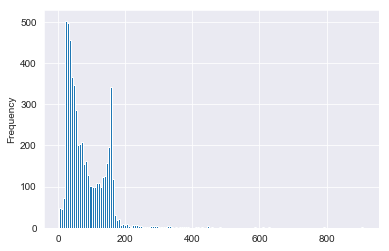

In [29]:
# See the distribution of message length
# "Text Length" may be a good feature to think about
messages['length'].plot.hist(bins=150)

In [30]:
# Max message length is 910, mean 80.5
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [31]:
# let's find the largest message using pandas masking
messages[messages['length']> 900]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [33]:
# To read the message
messages[messages['length']> 900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Here we notice that spam messages tend to be shorter than ham messages - there's a drop off around 150. This looks like a good data feature for evaluating spam

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d4a1518>,
      dtype=object)

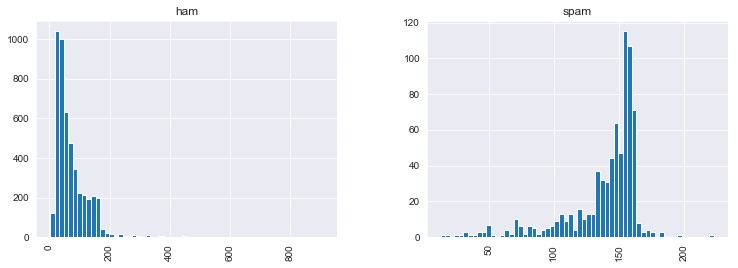

In [36]:
# Break out histograms of length by label
# sort of Pandas built-in viz version of 'FacetGrid'
messages.hist(column='length',by='label', bins=60, figsize=(12,4))


### Text Preprocessing

In [37]:
import string

In [38]:
# An example of how this will work
mess = 'sample message! Notice: it has punctuation.'

In [39]:
# The string punctuation list 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
# Using list comprehension to extract punctuation from our message
nopunc = [c for c  in mess if c not in string.punctuation]

In [43]:
# Notice that it's remove and left a blank for every instance of punctuation.
print(nopunc)

['s', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']


In [44]:
# Import the stopwords
from nltk.corpus import stopwords

In [45]:
# The english stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
# Joining the words back together from the letters
nopunc = ''.join(nopunc)

In [48]:
nopunc

'sample message Notice it has punctuation'

In [49]:
# Another example
x = ['a','b','c','d']

In [50]:
''.join(x)

'abcd'

In [51]:
# Adding elements into the '' will sandwich it in the output
'+++'.join(x)

'a+++b+++c+++d'

In [52]:
mytest='bob'

In [53]:
# Works with fstrings!!!
f'{mytest}'.join(x)

'abobbbobcbobd'

In [54]:
# Make nopunc a list so we can use list comprehension to remove stopwords
nopunc.split()

['sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [58]:
# 
clean_mess = [word for word in nopunc.split()  if word.lower() not in stopwords.words()]

In [59]:
clean_mess

['sample', 'message', 'Notice', 'punctuation']

#### Putting this all into a function

In [61]:
def text_process(mess):
    """
    1. remove punc
    2. remove stopwords
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation ]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split()  if word.lower() not in stopwords.words('english')]



In [65]:
messages['message'][:6]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
Name: message, dtype: object

In [66]:
# Now tokenize these messages

messages['message'][:6].apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
Name: message, dtype: object

### Using stemming and vectorization to process text data

**Stemming** is another way to process text data. Stemming is a way to take words that mean the same thing or have a common stem (Go, going, gone, leave) and view them as one word. (run running ran).


The problem is that you need a reference dictionary to make that work. Luckily NLTK has a lot of these built in datasets, corpii and references.

Focusing back to **Vectorization**

Now to convert each message into a vector that scikit-learn's algorithm model can work with.

*Convert each message as a list of tokens into a Vector*:

1. Count how many times does a word occur in each message? -  **Term Frequency**
2. Weigh the counts so that frequent tokens get lower weight. - **Inverse Document Frequency**
3. Normalize the vectors to unit length, to abstract from the original text length - **L2 norm**


We will use scikit-learn's **CountVectorizer** model.

We can think of this as a two dimensional matrix. 
   - One dimension is the entire vocabulary - one row per word
   - the other dimension are the actual documents - one column per text message
   
It will create a matrix something like this:



| wordcount   | Message 1   | Message 2     | ...| Message N|
| :---        | :----       | :---          |:---| :---     |
| Word 1 Count| 0           |  1            | ...| 0        |
| Word 2 Count| 1           |  1            | ...| 0        |
| Word 3 Count| 1           |  0            | ...| 1        |


Because many words won't have entries, scikit-learn will output a *Sparse Matrix* 



In [67]:
# import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
# may take some time to run.
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocabulary words
print(len(bow_transformer.vocabulary_))

11425


In [69]:
# the 4th message
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [71]:
# The Vector Representation
bow4 = bow_transformer.transform([message4])
print(bow4)
# Note that there are only 7 unique words in message 4 after removing all the stopwords
# Two of them appear twice 
print('Bow4 Shape', bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
Bow4 Shape (1, 11425)


In [72]:
 # Check to see which ones appear twice using the bow_transformer and the word number (4068 and 9554 here)
bow_transformer.get_feature_names()[4068]

'U'

In [73]:
bow_transformer.get_feature_names()[9554]

'say'


**the Bag Of Words corpus is a large sparse matrix**

In [74]:
# This could take some time.
messages_bow = bow_transformer.transform(messages['message'])

In [77]:
print('Shape of the sparse matrix: ', messages_bow.shape)

Shape of the sparse matrix:  (5572, 11425)


In [78]:
# Check the amount of non-zero occurrences
messages_bow.nnz

50548

In [79]:
# Evaluate Sparsity
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
# using round() will drop the sparsity to 0
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [80]:
# Here's the real sparsity
# A comparison of the non-zero messages to the total number of messages
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.


### Using TF-IDF

TF-IDF stands for *term frequency-inverse document frequency*



In [82]:
# Import the model
from sklearn.feature_extraction.text import TfidfTransformer

In [83]:
# Instantiate the model object and fit it to the BOW
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [84]:
# Transform the 4th message we did earlier
tfidf4 = tfidf_transformer.transform(bow4)

In [87]:
tfidf4.shape

(1, 11425)

**Now we've transformed a word count into a TFIDF**

You can interpret the numbers as a *Weight Value* for each of the words

In [88]:

print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


Now we can check the *Inverse Document Frequency* for a particular word.


Check the document frequency for the word 'University'

In [89]:
 tfidf_transformer.idf_

array([8.23939443, 8.5270765 , 8.93254161, ..., 8.93254161, 6.98663146,
       8.93254161])

In [92]:
# This is a little hairy, but this is the Inverse Document Frequency for University
tfidf_transformer.idf_[bow_transformer.vocabulary_['University']]

8.93254160700959

**Now let's convert the entire Bag Of Words corpus into a TF-IDF corpus at once**

In [93]:
# Make an object, and pass in the entire corpus of messages_bow rather than a single entry
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [94]:
messages_tfidf.shape

(5572, 11425)

In [101]:
type(messages_tfidf)

scipy.sparse.csr.csr_matrix

In [100]:
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829


*Fit Syntax*   
MultinomialNB.fit(self, X, y, sample_weight=None)

In [103]:
# Import the Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB


In [110]:
# Instantiate the model and fit it to the TFIDF of the messages with 
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

**Now try to classify a single random message and see how we do**

In [114]:
# Now for the prediction. Remember that the [0] means the message element of the matrix
spam_detect_model.predict(tfidf4)[0]

'ham'

In [116]:
# Now check the 4th message for its label
messages['label'][3]

'ham'

**To run this on all the messages:**



In [117]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [119]:
type(all_pred)

numpy.ndarray

In [120]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

**In this case the Testing set is the same as the Training Set, so we can't estimate the predictive power of the model**

Now to use the model with Train/Test Split

In [121]:
# The Train/Test Split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'], test_size=0.3, random_state=101)



In [123]:
msg_train.head()

4028        Yes, princess. Are you going to make me moan?
1310              Ok, be careful ! Don't text and drive !
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814                Pls i wont belive god.not only jesus.
Name: message, dtype: object

### Creating pipelines
What we haven't done is all the steps we did before to vectorize, make the Bag Of Words, etc. But this is such a common process that SciKit-Learn already has a Data Pipeline feature to summarize the work

In [124]:
# Import the pipeline
from sklearn.pipeline import Pipeline

In [142]:
# Instantiate an instance of the pipeline model
# pipline only takes a 'steps' argument, so tell it what you want it to do
# the first argument is a tuple
# 1. Strings To Token Integer Step with CountVectorizer
# 2. TFIDF transform with TfidfTransformer
# 3. Train this on the model with MultinomialNB (or another Classifier)
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    
])

**Mae a fitted pipeline object**

In [143]:
# treat the pipeline model as a normal Estimator
# This will perform those three steps in the pipeline
# Will take some time - it's fitting and training all the data
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x12ce33400>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

**Making predictions**

96% - pretty good

In [144]:
predictions = pipeline.predict(msg_test)

In [145]:
# Printing results
print('Classification Report')
print(classification_report(label_test,predictions))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(label_test,predictions))

Classification Report
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672



Confusion Matrix
[[1475    0]
 [  68  129]]


### Now test with a different Classifier

Using Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
# Instantiate an instance of the pipeline model
# pipline only takes a 'steps' argument, so tell it what you want it to do
# the first argument is a tuple
# 1. Strings To Token Integer Step with CountVectorizer
# 2. TFIDF transform with TfidfTransformer
# 3. Train this on the model with MultinomialNB (or another Classifier)
pipeline1 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [136]:
pipeline1.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x12ce33400>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [140]:
predictions1 = pipeline1.predict(msg_test)

In [141]:
print('Classification Report')
print(classification_report(label_test,predictions1))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(label_test,predictions1))

Classification Report
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       0.98      0.73      0.83       197

   micro avg       0.97      0.97      0.97      1672
   macro avg       0.97      0.86      0.91      1672
weighted avg       0.97      0.97      0.96      1672



Confusion Matrix
[[1472    3]
 [  54  143]]
